 ## HUMBIO51 Midterm
 
This is an open note take-home midterm exam. You may refer to class notes and any on-line references you find helpful. 

You may copy code from your notes or previous assignments as a starting template for the questions. You can also use helper functions that we wrote in class. 

The exam is subject to the honor code and you may not discuss the assignment with others.

You can contact the instructors for clarifications on the questions. 

Partial credit will be given, so make sure to complete as much of the code as possible. 
  

In [41]:
##INSTRUCTOR INFO TAKE OUT FOR EXAM
import sys
sys.path.append('../helpers')

#Imports the module central_dogma_helpers.py
import central_dogma_helpers
from central_dogma_helpers import *

def insert_newlines(string,every=70):
    lines=[]
    for i in range(0,len(string),every):
        lines.append(string[i:i+every])
    return lines

HIV1_DNA=read_nt_from_fastasequence('data_instructor/NC_001802.1_HIV1.txt')
HIV1_RNA=write_RNA_from_DNA(HIV1_DNA)
HIV1_RNA_lines=insert_newlines(HIV1_RNA)


f =open('data/NC_001802_HIV1_RNA.txt', 'w') 
for line in HIV1_RNA_lines:
    f.write(line)
    f.write("\n")
f.close()


### QUESTION 1a 

As we learned in class, DNA usually codes for RNA which gets translated into protein. However, there are some viruses, called retroviruses, that can make DNA from RNA. Human immunodeficiency virus (HIV) is an example of a retrovirus. 

This question will look at the HIV sequence from NCBI. 

First define a helper function to write a DNA sequence from an RNA sequence

In [108]:
## BEGIN SOLUTION ##
def write_DNA_from_RNA(RNAsequence):
    DNAsequence=RNAsequence.replace('U','T')
    return(DNAsequence)
## END SOLUTION ##

### QUESTION 1b

The HIV1 RNA sequence has been saved in the file: data/NC_001802_HIV1_RNA.txt 
from the starting working directory for this assignment. 

In [109]:
#Read the FASTA RNA sequence for HIV1 (data/NC_001802_HIV1_RNA.txt) into Python. 
#Use the helper function defined in question 1a to define a variable in Python with the HIV1 DNA sequence. 
import sys
sys.path.append('../helpers')

#Imports the module central_dogma_helpers.py
import central_dogma_helpers
from central_dogma_helpers import *

HIV1_RNA=read_nt_from_fastasequence('data/NC_001802_HIV1_RNA.txt')
HIV1_DNA=write_DNA_from_RNA(HIV1_RNA)

### QUESTION 1c

In [110]:
#Print the first 70 characters of the variable for the HIV1 DNA sequence 
#Remember to use zero-based numbering 
print(HIV1_DNA[0:70])

GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCC


### QUESTION 1d

How many open reading frames (bases between the start and stop codon pairs) are there in the HIV1_DNA sequence that have a length > 300base pairs? 

Write a block of code that prints out ONLY the following string: "The number of open reading frames with >300 base pairs is: " followed by the number of open reading frames >300 base pairs.  

In [111]:
#Show your code for calcuating the number of open reading frames > 300 base pairs

k=0
for i in range(0,len(HIV1_DNA)):
      if HIV1_DNA[i:i+3]=='ATG':
        
        #loops over each character in the mRNAsequence and looks to see if it is a stop codon TAA,TAG or TGA.
        for j in range(i+3,len(HIV1_DNA),3):
            if HIV1_DNA[j:j+3]=='TAA' or \
               HIV1_DNA[j:j+3]=='TAG' or \
               HIV1_DNA[j:j+3]=='TGA': 
                    if j-i>300:
                        k=k+1
                    break
print ("The number of open reading frames with > 300 base pairs is: "+ str(k))

The number of open reading frames with > 300 base pairs is: 50


### QUESTION 1e

The gene in HIV-1 RNA that gets translated into the gag protein which is required for virus assembly is from position 336 to 1838 (1-based numbering) in the RNA sequence.


In [112]:
#Write out the protein sequence for the gag protein. 
gag=write_protein_1_letter_aa_from_RNA(HIV1_RNA[335:1838])
print(gag)

MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAVNPGLLETSEGCRQILGQLQPSLQTGSEELRSLYNTVATLYCVHQRIEIKDTKEALDKIEEEQNKSKKKAQQAAADTGHSNQVSQNYPIVQNIQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEGATPQDLNTMLNTVGGHQAAMQMLKETINEEAAEWDRVHPVHAGPIAPGQMREPRGSDIAGTTSTLQEQIGWMTNNPPIPVGEIYKRWIILGLNKIVRMYSPTSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANPDCKTILKALGPAATLEEMMTACQGVGGPGHKARVLAEAMSQVTNSATIMMQRGNFRNQRKIVKCFNCGKEGHTARNCRAPRKKGCWKCGKEGHQMKDCTERQANFLGKIWPSYKGRPGNFLQSRPEPTAPPEESFRSGVETTTPPQKQEPIDKELYPLTSLRSLFGNDPSSQ*


### QUESTION 1f

The A431V and I437V mutations in the gag protein can affect resistance to protease inhibitors which are used to treat HIV (see more [here](https://www.ncbi.nlm.nih.gov/pubmed/19300491)). Make the gag protein sequence with both mutations. 

Write out the gag protein sequence with BOTH the A431V and I437V mutations to a file.  

In [117]:
## BEGIN SOLUTION ## 
print(gag[430]) 
print(len(gag))
gag_A431V=gag[0:430]+'V'+gag[431:]
print(gag_A431V[430]) 
print (len(gag_A431V))


print(gag_A431V[436]) 
gag_A431V_I437V=gag[0:436]+'V'+gag[437:]
print(gag_A431V_I437V[436]) 
print (len(gag_A431V_I437V))

f =open('data/gag_A431V_I437V.txt', 'w') 

f.write(gag_A431V_I437V) 

f.close () 

## END SOLUTION ##

A
501
V
501
I
V
501


### QUESTION 1g

Double stranded DNA that is made from RNA in retroviruses can integrate into genomes, causing persistent infections. 

Researchers have identified position 33059398 on Chromosome 7 in the hg19 version of the human genome as a common location where the HIV viral sequence will integrate into the human genome (see link [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4836361/) for more information.) 

Look up the site in the [WashU Epigenome Browser ](http://epigenomegateway.wustl.edu/legacy/). 

What gene is 33059398 on Chromosome 7 in? 

#### BEGIN ANSWER #### 
NT5C3A
#### END ANSWER ####  

Is insertion of the viral genome at 33059398 on Chromosome 7 in the human genome likely to affect translation of the gene from the question above? Why or why not?

#### BEGIN ANSWER #### 
In an intron, so not likely to affect translation
#### END ANSWER ####  

## QUESTION 2

We are interested in examining the evolutionary behavior and expression patterns of two genes, GENE1 and GENE2. We have found the coordinates of both genes in the hg19 (human) and mm9 (mouse) reference assemblies. These coordinates are provided in the following bed files: 

* data/GENE1.hg19.exons.bed 
* data/GENE2.hg19.exons.bed 
* data/GENE1.mm9.exons.bed 
* data/GENE2.mm9.exons.bed 



### 2a) 
Write a block of code to v iew the contents of one or more of the BED files

In [2]:
## BEGIN SOLUTION ##
!cat data/GENE1.hg19.exons.bed 
## END SOLUTION ##

chr1	203053037	203053159	exon1	1	-
chr1	203053775	203053856	exon2	1	-
chr1	203054617	203055089	exon3	1	-






### 2b) 
Extract the fasta DNA sequence for each human gene. Store the fasta sequences in the files: 

* data/GENE1.hg19.exons.fa
* data/GENE2.hg19.exons.fa
* data/GENE1.mm9.exons.fa  --> We have already generated this file for you. 
* data/GENE2.mm9.exons.fa --> We have already generated this file for you. 

Hint: You can find the reference hg19 assembly in /data/hg19.genome.fa

In [3]:
## BEGIN SOLUTION ## 
!fastaFromBed -fi /data/hg19.genome.fa -bed data/GENE1.hg19.exons.bed > GENE1.hg19.exons.fa
!fastaFromBed -fi /data/hg19.genome.fa -bed data/GENE2.hg19.exons.bed > GENE2.hg19.exons.fa
## END SOLUTION ## 

## 2c) 
Write a function to convert a fasta format DNA file to a file with a single string of DNA bases. 
For example: 
```    
>seq1
AAAAA
>seq2
TTTT
```
would be converted to: 
```
AAAATTTT
```

In [4]:
def fasta_to_string(input_fasta_file,output_string_file): 
## BEGIN SOLUTION 
    file_contents=open(input_fasta_file,'r')
    output_string=""
    for line in file_contents: 
        if line.startswith(">")==False: 
            output_string=output_string+line.strip('\n')
    f =open(output_string_file, 'w') 
    f.write(output_string) 
    f.close () 
## END SOLUTION 


In [5]:
fasta_to_string("GENE1.hg19.exons.fa","data/GENE1.hg19.exons.dna.txt")
fasta_to_string("GENE2.hg19.exons.fa","data/GENE2.hg19.exons.dna.txt")
fasta_to_string("data/GENE1.mm9.exons.fa","data/GENE1.mm9.exons.dna.txt")
fasta_to_string("data/GENE2.mm9.exons.fa","data/GENE2.mm9.exons.dna.txt")

#Sanity check one of the files to ensure your fasta-to-string conversion is working properly
!cat data/GENE2.hg19.exons.dna.txt

ATGGACTGCTGCACCGAGAACGCCTGCTCCAAGCCGGACGACGACATTCTAGACATCCCGCTGGACGATCCCGGCGCCAACGCGGCCGCCGCCAAAATCCAGGCGAGTTTTCGGGGCCACATGGCGCGGAAGAAGATAAAGAGCGGAGAGCGCGGCCGGAAgggcccgggccctggggggcctggcggagctggggtggcccggggaggcgcgggcggcggccccAGCGGAGACTAG

### 2d) 
Use the helper functions we defined in class to extract the RNA sequence for each of the 4 genes. 
Hint: We have added a new function called "reverse_complement" in the central_dogma_helpers help file. This function computes the reverse complement sequence. An example use case is below: 


In [6]:
import sys 
sys.path.append("../helpers/")

import central_dogma_helpers
from central_dogma_helpers import * 

reverse_complement("ACT")

'AGT'

In [7]:
#Uses the variables gene1_hg19_rna, gene2_hg19_rna, gene1_mm9_rna, gene2_mm9_rna to store the RNA sequences. 
## BEGIN SOLUTION

GENE1_human=open('data/GENE1.hg19.exons.dna.txt','r').read().strip()
GENE2_human=open('data/GENE2.hg19.exons.dna.txt','r').read().strip()

GENE1_mouse=open('data/GENE1.mm9.exons.dna.txt','r').read().strip()
GENE2_mouse=open('data/GENE2.mm9.exons.dna.txt','r').read().strip()

gene1_hg19_rna=write_RNA_from_DNA(reverse_complement(GENE1_human))

gene2_hg19_rna=write_RNA_from_DNA(GENE2_human)

gene1_mm9_rna=write_RNA_from_DNA(GENE1_mouse)
gene2_mm9_rna=write_RNA_from_DNA(reverse_complement(GENE2_mouse))

## END SOLUTION 


## 2e) 
Use the helper functions we defined in class to extract the 1-letter amino acid sequence for each gene. 


In [8]:
#Uses the variables gene1_hg19_aa, gene2_hg19_aa, gene1_mm9_aa, gene2_mm9_aa to store the 1-letter amino acid sequences. 

## BEGIN SOLUTION ## 

gene1_hg19_aa=write_protein_1_letter_aa_from_RNA(gene1_hg19_rna)
gene2_hg19_aa=write_protein_1_letter_aa_from_RNA(gene2_hg19_rna)
gene1_mm9_aa=write_protein_1_letter_aa_from_RNA(gene1_mm9_rna)
gene2_mm9_aa=write_protein_1_letter_aa_from_RNA(gene2_mm9_rna)

## END SOLUTION 

print("gene1_hg19_aa:")
print(gene1_hg19_aa)

print("gene1_mm9_aa:")
print(gene1_mm9_aa)

print("gene2_hg19_aa")
print(gene2_hg19_aa)

print("gene2_mm9_aa")
print(gene2_mm9_aa)

gene1_hg19_aa:
MELYETSPYFYQEPRFYDGENYLPVHLQGFEPPGYERTELTLSPEAPGPLEDKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKKVNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDLRYRGGGGPQPGGAQRMQLSQRLLQSRVGQCTGVQRQPRDHLLTADPTDAHNLHSLTSIVDSITVEDVSVAFPDETMPN*
gene1_mm9_aa:
MELYETSPYFYQEPHFYDGENYLPVHLQGFEPPGYERTELSLSPEARGPLEEKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKKVNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDLRYRGGGGPQPMVPSECNSHSASCSPEWGNALEFGPNPGDHLLAADPTDAHNLHSLTSIVDSITVEDMSVAFPDETMPN*
gene2_hg19_aa
MDCCTENACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSGERGRKGPGPGGPGGAGVARGGAGGGPSGD*
gene2_mm9_aa
MDCCTESACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSGECGRKGPGPGGPGGAGGARGGAGGGPSGD*


## 2f) 

Use the pairwise2.align module to perform pairwise-sequence alignment between  gene1_hg19_aa and gene1_mm9_aa 

In [9]:
import sequence_alignment_helpers
from sequence_alignment_helpers import *
from Bio import pairwise2 

In [10]:
## BEGIN SOLUTION ## 
alignments = pairwise2.align.globalxx(gene1_hg19_aa, gene1_mm9_aa)

#uses the sequence_alignment_helper functions to print the alignments with a nice format
first_alignment=alignments[0]
alignment_score=first_alignment[2] 
print("Score for first alignment:"+str(alignment_score))

##OPTIONAL-- 
align1_linebreaks=insert_newlines(first_alignment[0])
align2_linebreaks=insert_newlines(first_alignment[1])
 

#format_alignment_linebreak inputs are: align1_linebreaks,align2_linebreaks,score,begin,end,seq1,seq2
print(format_alignment_linebreak(align1_linebreaks,align2_linebreaks,alignments[0][2],alignments[0][3],
                                 alignments[0][4],"human","mouse"))

## END SOLUTION ## 


Score for first alignment:197.0
human: MELYETSPYFYQEPR-FYDGENYLPVHLQGFEPPGYERTELT-LSPEAP-
       ||||||||||||||||||||||||||||||||||||||||||||||||||
mouse: MELYETSPYFYQEP-HFYDGENYLPVHLQGFEPPGYERTEL-SLSPEA-R

human: GPLED-KGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKK
       ||||||||||||||||||||||||||||||||||||||||||||||||||
mouse: GPLE-EKGLGTPEHCPGQCLPWACKVCKRKSVSVDRRRAATLREKRRLKK

human: VNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDL
       ||||||||||||||||||||||||||||||||||||||||||||||||||
mouse: VNEAFEALKRSTLLNPNQRLPKVEILRSAIQYIERLQALLSSLNQEERDL

human: RYRGGGGPQPGGAQRMQL--SQRLLQ---SRVGQ----CT----GVQRQ-
       ||||||||||||||||||||||||||||||||||||||||||||||||||
mouse: RYRGGGGPQP-----M--VPS-----ECNS----HSASC-SPEWG----N

human: -----PR---DHLLTA-DPTDAHNLHSLTSIVDSITVEDV-SVAFPDETM
       ||||||||||||||||||||||||||||||||||||||||||||||||||
mouse: ALEFGP-NPGDHLL-AADPTDAHNLHSLTSIVDSITVED-MSVAFPDETM

human: PN*
       |||
mouse: PN*

  Score=  197
  Begin=  0
  End  =  253
  Length= 253



## 2g) 
Use the pairwise2.align module to perform pairwise-sequence alignment between gene2_hg19_aa and gene2_mm9_aa 

In [11]:
## BEGIN SOLUTION ## 
alignments = pairwise2.align.globalxx(gene2_hg19_aa, gene2_mm9_aa)

#uses the sequence_alignment_helper functions to print the alignments with a nice format
first_alignment=alignments[0]
alignment_score=first_alignment[2] 
print("Score for first alignment:"+str(alignment_score))

##OPTIONAL-- 
align1_linebreaks=insert_newlines(first_alignment[0])
align2_linebreaks=insert_newlines(first_alignment[1])
 

#format_alignment_linebreak inputs are: align1_linebreaks,align2_linebreaks,score,begin,end,seq1,seq2
print(format_alignment_linebreak(align1_linebreaks,align2_linebreaks,alignments[0][2],alignments[0][3],
                                 alignments[0][4],"human","mouse"))


## END SOLUTION ## 

Score for first alignment:76.0
human: MDCCTEN-ACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSG
       ||||||||||||||||||||||||||||||||||||||||||||||||||
mouse: MDCCTE-SACSKPDDDILDIPLDDPGANAAAAKIQASFRGHMARKKIKSG

human: ER-GRKGPGPGGPGGAGV-ARGGAGGGPSGD*
       ||||||||||||||||||||||||||||||||
mouse: E-CGRKGPGPGGPGGAG-GARGGAGGGPSGD*

  Score=  76
  Begin=  0
  End  =  82
  Length= 82



## 2h) 
Which gene is more conserved between humans and mice, GENE1 or GENE2? How can you tell? 



#### BEGIN ANSWER #### 
#### END ANSWER #### 

## QUESTION 3 

We would like to learn what organ system GENE1 and GENE2 are most highly expressed in within the mouse. To do this, we will use RNAseq data from ENCODE (http://chromosome.sdsc.edu/mouse/download.html). We have pre-processed the data into a gene expression matrix (data/mm9.rnaseq.fpkm.tsv) and a corresponding metadata file (data/mm9.rnaseq.metadata.tsv). You will use these files for question 2. 



### 3a) ###

Use the WashU browser to determine the identity of GENE1 and GENE2. Note: please report both the common gene name and the NM_ identifier value from the mm9 genome. 



#### BEGIN ANSWER #### 
MyoG, NM_031189
Nrgn, NM_022029
#### END ANSWER ####

### 3b) ###
Read in the RNA-Seq datatable "data/mm9.rnaseq.fpkm.tsv" into a dataframe using the pandas package. Use the head command to print the first 10 lines of the dataframe.

In [12]:
# use the variable rnaseq to store the pandas dataframe
## BEGIN SOLUTION ## 
import pandas as pd   
rnaseq_filename='data/mm9.rnaseq.fpkm.tsv'

# Read in the RNA-seq data matrix. 
rnaseq= pd.read_table(filepath_or_buffer=rnaseq_filename, 
     header=0,
     index_col=0)

rnaseq.head(10)
## END SOLUTION ## 

,heart1-zy6,lung1-zy10,mESC-zy27,kidney2-zy16,placenta-2,brain-E14,heart2-zy7,cortex2-zy14,spleen2-zy9,boneMarrow2-zy26,...,mef-male1-zy17,boneMarrow1-zy24,intestine-2,lung2-zy11,liver1-zy4,spleen1-zy8,cerebellum1-zy21,olfactory-2,heart-E14,placenta-1
NM_011441,2.254890,4.336400,0.212058,0.960460,2.62398,0.51333,1.353380,0.106251,0.575847,0.297424,...,0.000000,0.039413,0.105708,4.71983,0.347552,0.689417,0.404162,0.904820,0.873090,2.19965
NM_025300,7.583560,2.323340,23.179600,4.920100,4.69549,7.34801,7.412210,3.865600,4.427460,4.581390,...,8.075880,7.392750,7.863720,1.96798,3.743500,6.701990,4.186450,5.506150,10.256600,4.17015
NM_008866,4.737040,3.832030,31.991800,23.730700,11.37850,8.60540,3.965590,3.329030,2.991480,1.626060,...,13.292800,2.053090,37.456300,4.14774,7.317360,4.670900,7.481730,8.729460,14.243400,12.58080
NM_001159750,2.079380,2.996970,21.799800,3.036960,6.05676,10.74390,1.056030,5.013350,3.505370,4.125510,...,18.337100,4.762580,3.091350,2.35791,3.647510,3.578290,4.965500,6.253020,7.277450,4.03515
NM_001159751,0.751692,0.994478,1.479500,2.558080,0.00000,4.93156,0.888016,0.851652,2.056400,2.042700,...,0.000000,0.000000,1.304400,1.59578,3.612130,3.468520,3.203380,0.000000,2.003800,2.29215
NM_133826,2.982250,6.629980,19.314400,16.499100,10.92590,19.69960,2.484040,25.558000,5.227300,3.062300,...,15.895600,3.558540,7.730220,6.73786,8.734990,6.042640,15.670900,13.058400,6.997890,11.22340
NM_009826,3.578000,4.065270,5.779170,4.129500,8.16231,9.95187,2.852720,7.387660,1.426160,2.261860,...,13.945400,2.546050,4.193170,3.48497,5.767800,2.622910,7.831170,7.165800,5.404700,7.65890
NM_173868,0.000000,0.000000,0.009436,0.000000,0.00000,6.19197,0.000000,0.867198,0.011826,0.000000,...,0.008398,0.000000,0.103478,0.00000,0.000000,0.061352,14.472800,0.429446,0.000000,0.00000
NM_183028,5.060990,5.060030,9.841090,5.117730,3.69579,8.50304,3.712660,10.124600,3.041030,1.609480,...,7.220090,2.119160,2.481150,4.04919,12.941600,4.970270,15.055100,10.796100,5.428500,3.49453
NM_027671,0.032684,0.014074,0.000000,0.012361,0.00000,1.18441,0.016036,2.877990,0.033066,0.000000,...,0.023483,0.000000,0.065757,0.00000,0.051888,0.051464,0.747692,2.176390,0.182489,0.00000


### 3c) ###

Select the row of 'data/mm9.rnaseq.fpkm.tsv' that has the RNA-seq data for GENE1 and select the row that has RNA-seq data for GENE2. Store these values in the variables "gene1_rnaseq" and "gene2_rnaseq". 


In [13]:
## BEGIN SOLUTION ## 
gene1_rnaseq=rnaseq.loc['NM_031189']
gene2_rnaseq=rnaseq.loc['NM_022029']
## END SOLUTION ## 

### 3d) ### 
Generate histograms of GENE1 and GENE2 expression across all samples in the RNA-seq dataset. You will need to experiment with different values of the "binwidth" parameter to find one that clearly displays the range of values in the data set.  

In [14]:
## GENE1
## BEGIN SOLUTION ## 
import plotnine
from plotnine import *
qplot(x=gene1_rnaseq,
      geom="histogram",
      xlab="log(TPM)",
      ylab="Number of samples",
      binwidth=.25)
## END SOLUTION ## 

<Figure size 640x480 with 1 Axes>

<ggplot: (8746132632931)>

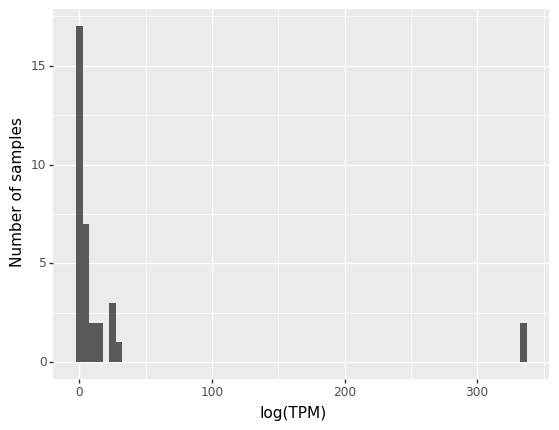

<ggplot: (8746132364878)>

In [15]:
## GENE2
## BEGIN SOLUTION ## 
import plotnine
from plotnine import *
qplot(x=gene2_rnaseq,
      geom="histogram",
      xlab="log(TPM)",
      ylab="Number of samples",
      binwidth=5)
## END SOLUTION ## 


### 3e) ### 
We observe some outliers in the histograms of expression for GENE1 and GENE2. Which sample has the highest expression of GENE1? Which sample has the highest expression of GENE2?

HINT: You can use the sort function which has the format: x=x.sort_values(ascending=False)

In [16]:
#Store the sample name with the highest expression of GENE1 in the variable sample1.
#Store the sample name with the highest expression of GENE2 in the variable sample2. 
## BEGIN SOLUTION ## 
gene1_rnaseq_sorted=gene1_rnaseq.sort_values(ascending=False)
gene2_rnaseq_sorted=gene2_rnaseq.sort_values(ascending=False)

sample1=gene1_rnaseq_sorted.index[0]
sample2=gene2_rnaseq_sorted.index[0]

print('gene1')
print(sample1)
print('gene2')
print(sample2)
## END SOLUTION ## 




gene1
limb-E14
gene2
cortex1-zy13


In [17]:
#Store the sample name with the highest expression of GENE1 in the variable sample1.
#Store the sample name with the higehst expression of GENE2 in the variable sample2. 
## BEGIN SOLUTION ## 
sample1=gene1_rnaseq.sort_values(ascending=False).index[0]
sample2=gene2_rnaseq.sort_values(ascending=False).index[0]
print(sample1)
print(sample2)
## END SOLUTION ## 

limb-E14
cortex1-zy13


### 3f) ###
Perform principle component analysis on the samples in the rnaseq dataframe. Decompose the data into 10 principle components.  

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing

#Note: we will scale our RNA-seq data to have a mean of 0 and a variance of 1. By making sure all sample values 
# are on the same scale, our PCA plot will provide a more informative visualization. 
rnaseq_scaled = preprocessing.scale(rnaseq)
#use the rnaseq_scaled variable as input for your PCA 

#store your PCA analysis output in a variable called PCA_results 

## BEGIN SOLUTION ##
from sklearn.decomposition import PCA as sklearnPCA

#We decompose the data into 10 principal components 
sklearn_pca = sklearnPCA(n_components=10)
pca_results = sklearn_pca.fit_transform(rnaseq_scaled.transpose())
## END SOLUTION ## 

### 3g) ###

Generate a scree plot of the variance explained by the first 10 principal components. 

[0.17675348 0.13045255 0.085208   0.0787134  0.07769887 0.07577149
 0.07112632 0.06924259 0.06507847 0.0417134 ]


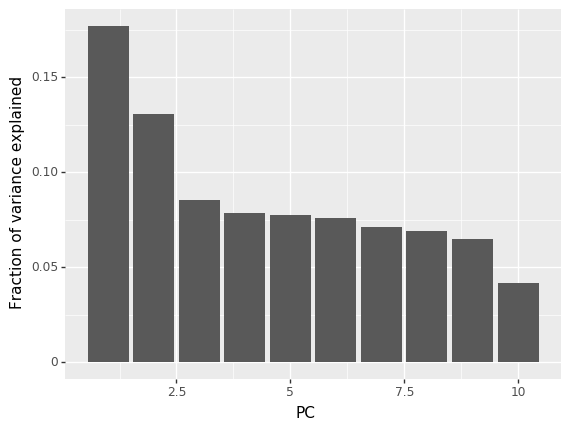

<ggplot: (-9223363290726748882)>

In [23]:
## BEGIN SOLUTION ## 
from plotnine import * 
y=sklearn_pca.explained_variance_ratio_
x=range(1,len(y)+1)
print(sklearn_pca.explained_variance_ratio_)
qplot(x=x,
      y=y,
      geom="bar",
      stat="identity",
      xlab="PC",
      ylab="Fraction of variance explained")
## END SOLUTION ## 

### 3h) ###

How much variance is explained by PC1? 

#### BEGIN ANSWER #### 
18%
#### END ANSWER ####

### 3i) ### 
Read in the metadata for the mouse rnaseq dataset from: data/mm9.rnaseq.metadata.tsv
Generate a scatterplot of PC1 vs PC2. Color the scatterplot by the System column from "mm9.rnaseq.metadata.tsv".

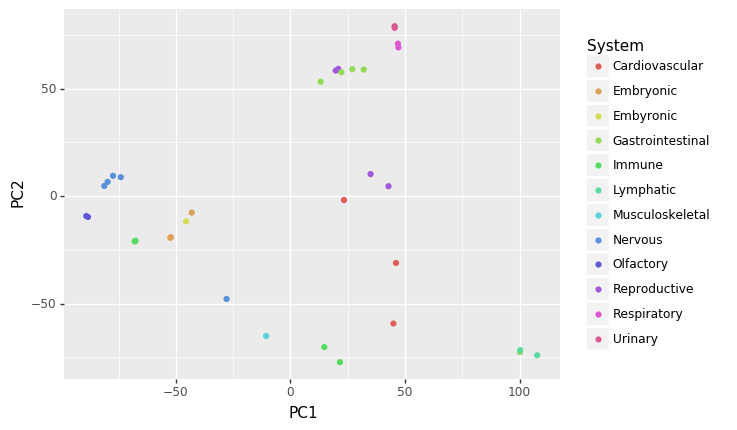

<ggplot: (8746127516136)>

In [24]:
## BEGIN SOLUTION ## 
metadata=pd.read_table("data/mm9.rnaseq.metadata.tsv",header=0,index_col=0)

x=pca_results[:,0]
y=pca_results[:,1]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2",
      color=list(metadata['System']))+scale_color_discrete(name="System")

## END SOLUTION ## 

### 3j) ### 
We will overlay the samples from 3e (the sample with the highest expression of GENE1, sample1) and the sample with the highest expression of GENE2 (sample 2) on the PCA to determine which organ systems these samples cluster closest too. 

In [25]:
sample1_row_index=metadata.index.get_loc(sample1)
sample1_pcs=pca_results[sample1_row_index,0:2]
print(sample1_pcs)

[-10.6249376  -65.04706293]


In [26]:
sample2_row_index=metadata.index.get_loc(sample2)
sample2_pcs=pca_results[sample2_row_index,0:2]
print(sample2_pcs)

[-81.23920158   4.75335422]


Based on the values in sample1_pcs and sample2_pcs, which organ systems do these samples cluster with? 

### BEGIN ANSWER ### 

### END ANSWER ### 